In [63]:
import pylab
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pyplot
from scipy import stats
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy.stats import kurtosis, skew
import warnings
%matplotlib inline


In [64]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
#  code_show_err = !code_show_err
# } 
# $( document ).ready(code_toggle);
# $( document ).ready(code_toggle_err);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code and errors."></form>''')

<h1 style="font-family:verdana;color:#3399ff"><center>
Bike Sharing Dataset Data Set </center></h1>

<h1><center>Description of our dataset </h1></center><br>
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

source : https://www.kaggle.com/c/bike-sharing-demand

Our goal is to choose the best regression model which will predict the number of bikes rental in a given hour, day and month.
We will use algorithm like:
* Linear Regression
* Random Forest Regression
* Gradient Boost
* XGB

The decision about choosing the best model will be based on smallest errors like:

* MAE
* MSE
* RMSLE

To obtain only positive values we will transform our count values to logarithm.
<br>
We will also see how the final model deals with predicting small values.




<h2 style="font-family:verdana;"><center>DATA LOAD AND SMALL PREPARATION:</center></h2>

In [65]:
data= pd.read_csv('hour.csv',sep=',')

<h1><center>INPUT VARIABLES:</center></h1>
#### Bike data:
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not 
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

<h1><center>DRAW A SAMPLE FROM A DATASET:</center></h1><br>
In this section we draw a smaple from our dataset which at the begining is quite big and because we want it to be draw a sample. 
<br>
Our first step is to draw the sample to have 8500 observations in our dataset ( they are random variables)

In [66]:
data = pd.DataFrame(data)
data=data.sample(8500)
data.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12617,12618,2012-06-14,2,1,6,22,0,4,1,2,0.64,0.6061,0.65,0.2239,46,196,242
7326,7327,2011-11-06,4,0,11,21,0,0,0,1,0.36,0.3636,0.81,0.0896,11,77,88
1463,1464,2011-03-06,1,0,3,7,0,0,0,3,0.42,0.4242,1.00,0.4478,0,5,5
12302,12303,2012-06-01,2,1,6,19,0,5,1,3,0.62,0.5606,0.88,0.3582,4,41,45
5537,5538,2011-08-23,3,0,8,15,0,2,1,1,0.72,0.6515,0.34,0.2239,178,423,601


Our next step was to see in what form our variables are and if we hae a problem of missing values. 

In [67]:
df1 = data.dtypes

df2 = data.isnull().sum() 
display(df1)
display(df2)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Because not all of the variables will be used we drop some of the variables that are not usefull in our analysis
<br>
1) First variable dropped was dteday - date
<br>
2) Second variable dropped was instant - record index

In [68]:
del data['dteday']

In [69]:
del data['instant']

<h1><center>DESCRIPTIVE STATISTICS</center></h1>

In [70]:
data.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12617,2,1,6,22,0,4,1,2,0.64,0.6061,0.65,0.2239,46,196,242
7326,4,0,11,21,0,0,0,1,0.36,0.3636,0.81,0.0896,11,77,88
1463,1,0,3,7,0,0,0,3,0.42,0.4242,1.00,0.4478,0,5,5
12302,2,1,6,19,0,5,1,3,0.62,0.5606,0.88,0.3582,4,41,45
5537,3,0,8,15,0,2,1,1,0.72,0.6515,0.34,0.2239,178,423,601


Our dependent variable will be cnt which full name is count (it is a continous variable) of total rental bikes including both casual and registered
<br>
Next step is to change the name of this variable to know what it represents 

In [71]:
data = data.rename(columns = {"cnt" :"count"})

In this step we change the order of values to have a clear devision of categorical and continous variables 

In [72]:
data = data[['count', 'registered','casual' , 'windspeed','hum','atemp','temp','weathersit','workingday','weekday','holiday','hr','mnth','yr','season']]

At the begining of our analysis we wanted to take a look into all of our variables to take a look at mean , std , min , max and quartiles to see if there is something suspicous visible at the first look. <br>
Our first observations were following:
<br>
1) In count values the minimum value is only one. For registered and casual is zero.It was probably caused by the winter season.
<br>
2) The weather is rather not windy.
<br>
3) We see that atemp and temp have very similar values. We assume that there will be correlation between these variables.


In [73]:
data.describe()

,count,registered,casual,windspeed,hum,atemp,temp,weathersit,workingday,weekday,holiday,hr,mnth,yr,season
count,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,188.926235,153.109412,35.816824,0.189550,0.627331,0.476505,0.497656,1.425294,0.683647,3.014000,0.029176,11.427529,6.539176,0.500118,2.497647
std,183.461109,152.991230,50.028049,0.122316,0.192243,0.170875,0.191635,0.639298,0.465080,1.999392,0.168311,6.906502,3.434492,0.500029,1.104545
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,38.000000,33.000000,4.000000,0.104500,0.480000,0.333300,0.340000,1.000000,0.000000,1.000000,0.000000,5.000000,4.000000,0.000000,2.000000
50%,139.000000,114.000000,16.000000,0.164200,0.620000,0.484800,0.500000,1.000000,1.000000,3.000000,0.000000,11.000000,7.000000,1.000000,2.000000
75%,279.000000,219.000000,48.000000,0.253700,0.780000,0.621200,0.660000,2.000000,1.000000,5.000000,0.000000,17.000000,10.000000,1.000000,3.000000
max,976.000000,885.000000,362.000000,0.850700,1.000000,0.984800,0.960000,3.000000,1.000000,6.000000,1.000000,23.000000,12.000000,1.000000,4.000000


We sum our dependent variable 

In [74]:
data['count'].sum()

1605873

<h2><center>CONTINUOUS VARIABLES</center></h2>

We make a subset of only continous variables to make it easier to make descriptive statistics 

In [75]:
df_continous= data[['count','temp',
 'atemp',
 'hum',
 'windspeed', 'casual',
 'registered']]
df_continous.head(5)

,count,temp,atemp,hum,windspeed,casual,registered
12617,242,0.64,0.6061,0.65,0.2239,46,196
7326,88,0.36,0.3636,0.81,0.0896,11,77
1463,5,0.42,0.4242,1.00,0.4478,0,5
12302,45,0.62,0.5606,0.88,0.3582,4,41
5537,601,0.72,0.6515,0.34,0.2239,178,423


Next step is to make scatterplots and histograms of all variables in a dataset to see if there is a relationship between variables 

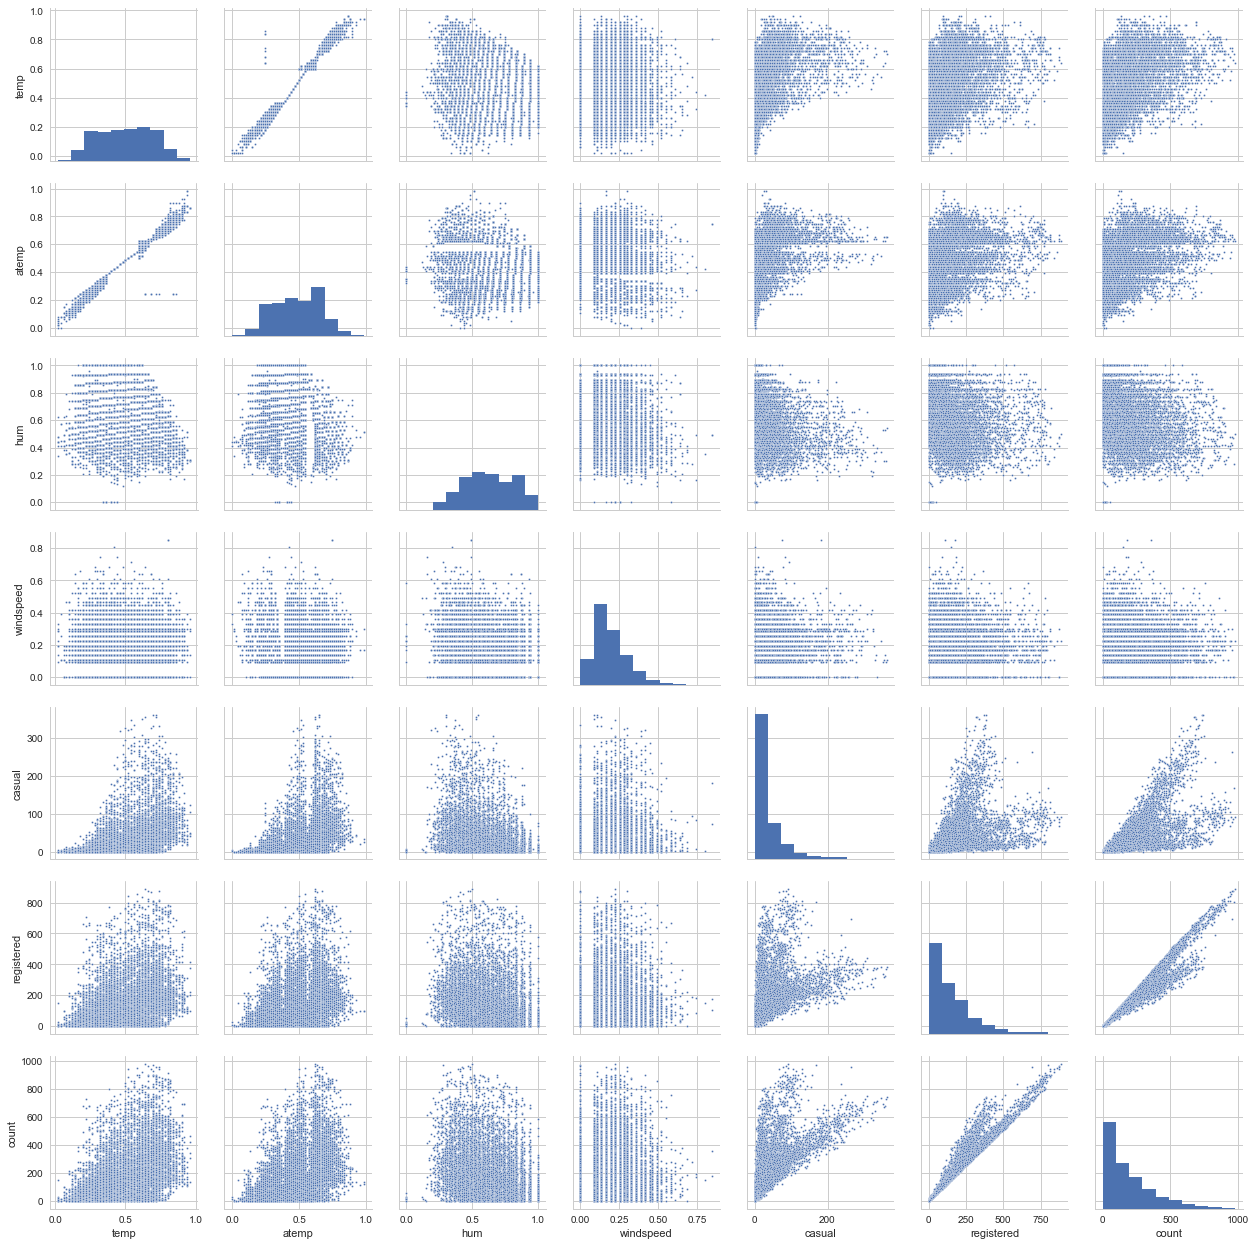

In [76]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid',context='notebook')
cols = ["temp" ,"atemp", "hum","windspeed","casual","registered", "count"]
sns.pairplot(df_continous[cols] , size=2.5,plot_kws={"s": 4})
plt.show()


We can see some interesting observations for pairs of variables : registered and count , atemp and count , temp and count , hum and count , windspeed and count , casual and count 
<br>
Below we have also made additional plots for those pairs of variables to make a closer look at them 

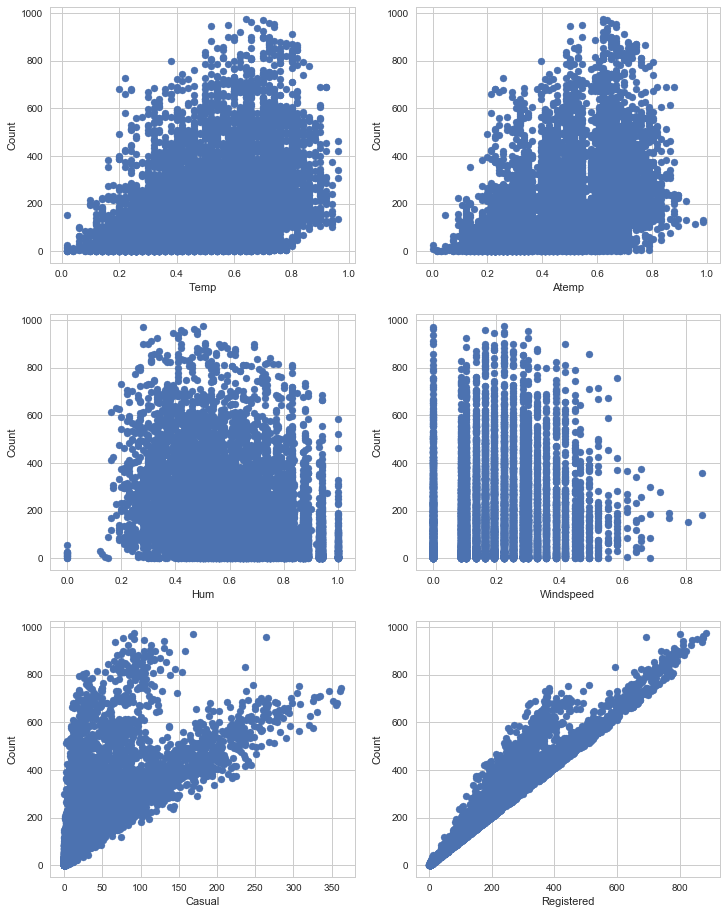

In [77]:
plt.figure(figsize=[12,16])
plt.subplot(321)
plt.scatter(df_continous['temp'], df_continous['count'])
plt.xlabel("Temp")
plt.ylabel("Count")
plt.subplot(322)
plt.scatter(df_continous['atemp'], df_continous['count'])
plt.xlabel("Atemp")
plt.ylabel("Count")
plt.subplot(323)
plt.scatter(df_continous['hum'], df_continous['count'])
plt.xlabel("Hum")
plt.ylabel("Count")
plt.subplot(324)
plt.scatter(df_continous['windspeed'], df_continous['count'])
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.subplot(325)
plt.scatter(df_continous['casual'], df_continous['count'])
plt.xlabel("Casual")
plt.ylabel("Count")
plt.subplot(326)
plt.scatter(df_continous['registered'], df_continous['count'])
plt.xlabel("Registered")
plt.ylabel("Count")
plt.show()

We can notice positive relation between Count and Registered ,  Count and Casual , Count and Temp and Count and Atemp
<br>
There is noticable no relationship between Count and Hum , Count and Windspeed 


Our next step was to see the distribution and histograms of the continous variables 
<br>
We can see that non of the variables has a normal distribution we can also detect some outliers aspecially in cases of variables atemp and temp and windspeed

Skewness of variable temp: -0.01329114631553367
In this case we have value > 0 , so we have positive skewness


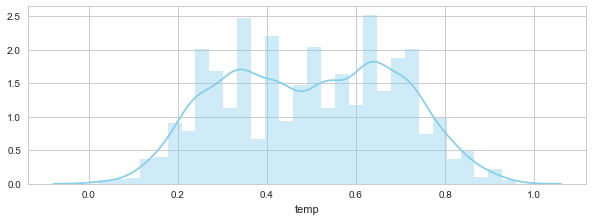

Skewness of variable temp: -0.09134012963913428
In this case we have value < 0 , so we have negative skewness


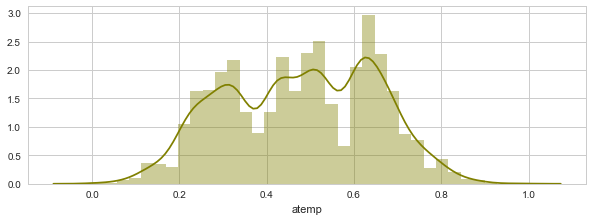

Skewness of variable temp: -0.09303219011257138
In this case we have value < 0 , so we have negative skewness


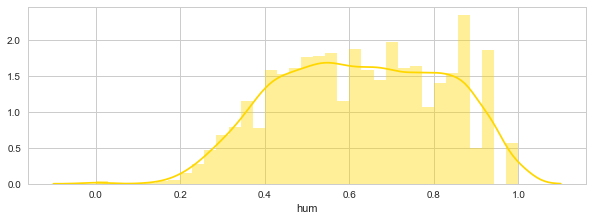

Skewness of variable temp: 0.6174178233254758
In this case we have value > 0 , so we have positive skewness


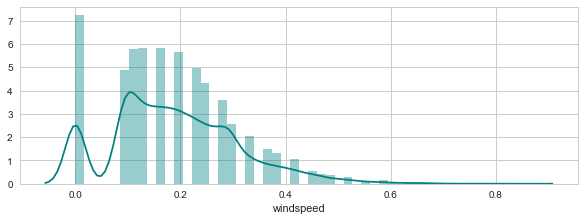

In [78]:
plt.figure(figsize=[10,15])
plt.subplot(411)
sns.distplot( df_continous["temp"] , color="skyblue")
print( 'Skewness of variable temp: {}'.format( skew(df_continous["temp"]) ))
print('In this case we have value > 0 , so we have positive skewness')
plt.show()
plt.figure(figsize=[10,15])
plt.subplot(412)
sns.distplot( df_continous["atemp"] , color="olive")
print( 'Skewness of variable temp: {}'.format( skew(df_continous["atemp"]) ))
print('In this case we have value < 0 , so we have negative skewness')
plt.show()
plt.figure(figsize=[10,15])
plt.subplot(413)
sns.distplot( df_continous["hum"] , color="gold")
print( 'Skewness of variable temp: {}'.format( skew(df_continous["hum"]) ))
print('In this case we have value < 0 , so we have negative skewness')
plt.show()
plt.figure(figsize=[10,15])
plt.subplot(414)
sns.distplot( df_continous["windspeed"] , color="teal")
print( 'Skewness of variable temp: {}'.format( skew(df_continous["windspeed"]) ))
print('In this case we have value > 0 , so we have positive skewness')
plt.show()

Skewness of normal distribution (should be 0) in our case it is > 0 : 2.5234136798664073
In this case we have value > 0 , so we have positive skewness


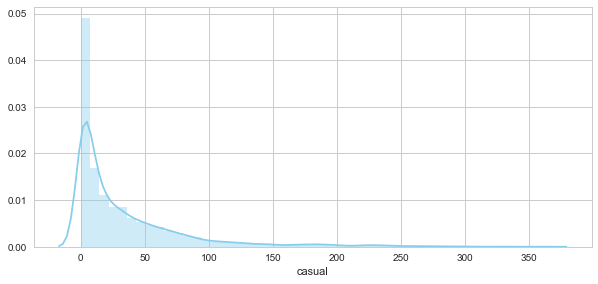

Skewness of normal distribution (should be 0) in our case it is > 0 : 1.5976950416098925
In this case we have value > 0 , so we have positive skewness


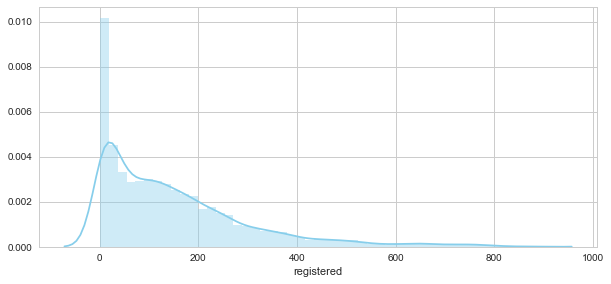

Skewness of normal distribution (should be 0) in our case it is > 0 : 1.306379789948648
In this case we have value > 0 , so we have positive skewness


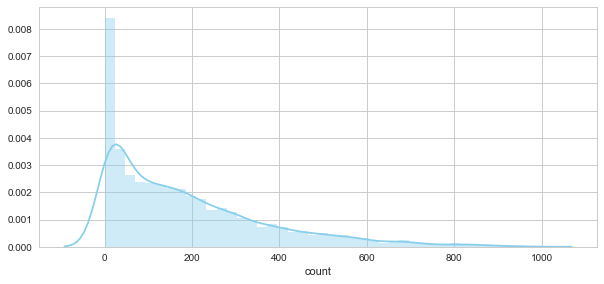

In [79]:
plt.figure(figsize=[10,15])
plt.subplot(311)
sns.distplot( df_continous["casual"] , color="skyblue")
print( 'Skewness of normal distribution (should be 0) in our case it is > 0 : {}'.format( skew(df_continous["casual"]) ))
print('In this case we have value > 0 , so we have positive skewness')
plt.show()
plt.figure(figsize=[10,15])
plt.subplot(312)
sns.distplot( df_continous["registered"] , color="skyblue")
print( 'Skewness of normal distribution (should be 0) in our case it is > 0 : {}'.format( skew(df_continous["registered"]) ))
print('In this case we have value > 0 , so we have positive skewness')
plt.show()
plt.figure(figsize=[10,15])
plt.subplot(313)
sns.distplot( df_continous["count"] , color="skyblue")
print( 'Skewness of normal distribution (should be 0) in our case it is > 0 : {}'.format( skew(df_continous["count"]) ))
print('In this case we have value > 0 , so we have positive skewness')
plt.show()

As we can see in none of the variables we had a case of normall distribution. <br>
Most of the variables had positive skewness. Cases of negative skewness where only in variables hum and atemp.

<h2><center>CATEGORICAL VARIABLES</center></h2>

Next step is to make boxplots of all categorical variables in a dataset to see if we can detect any outliers
<br>
We make a subset of data of only categorical variables to make it easier to draw box plots

In [80]:
df_categorical= data[['season',
 'yr',
 'mnth',
 'holiday', 'weekday',
 'workingday','weathersit' , 'hr']]

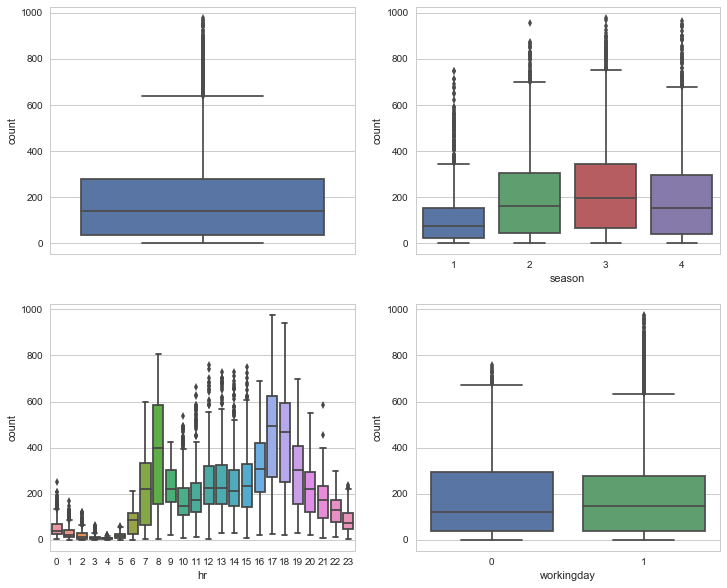

In [81]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_continous,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df_categorical,y=df_continous["count"],x="season",orient="v",ax=axes[0][1])
#nie dodaje label dla danej pory roku !!!!!!!!!!
plt.xticks([1, 2, 3 , 4], ['Fall', 'Spring', 'Summer' , 'Winter'])
sns.boxplot(data=df_categorical,y=df_continous["count"],x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=df_categorical,y=df_continous["count"],x="workingday",orient="v",ax=axes[1][1])
plt.show()


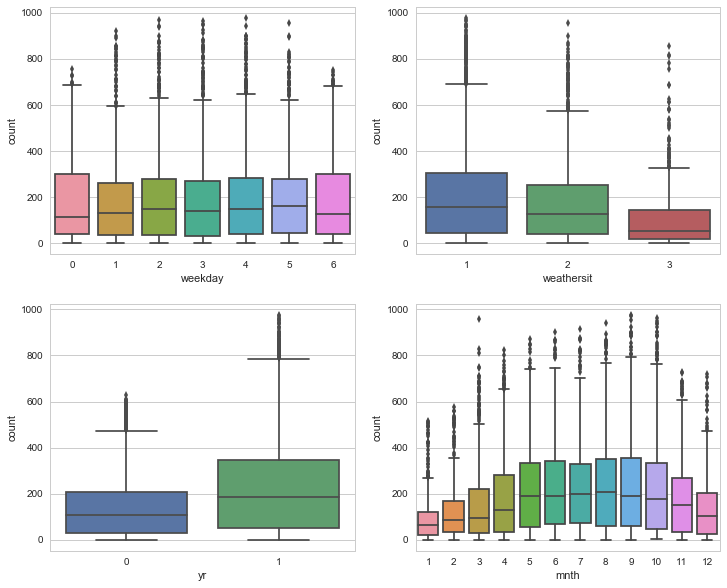

In [82]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=df_categorical,y=df_continous["count"],x="weekday",orient="v",ax=axes[0][0])
sns.boxplot(data=df_categorical,y=df_continous["count"],x="weathersit",orient="v",ax=axes[0][1])
sns.boxplot(data=df_categorical,y=df_continous["count"],x="yr",orient="v",ax=axes[1][0])
sns.boxplot(data=df_categorical,y=df_continous["count"],x="mnth",orient="v",ax=axes[1][1])
plt.show()

From the boxplots above it is noticable that our dataset has many outliers
<br>
Most noticable outliers can be seen in variables : season , weekday , month 

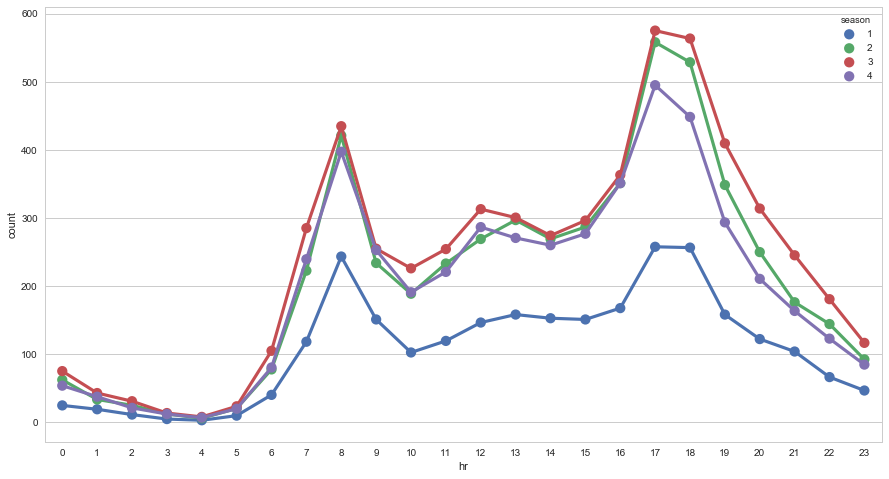

In [83]:
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(15,8)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
hourAggregated = pd.DataFrame(data.groupby(["hr","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hr"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax1)


<h2><center>DELETE OUTLIERS</center></h2>

To achive better results we have decided to remove detected outliers

In [84]:
print('Before deleting outliers',data.shape)

Before deleting outliers (8500, 15)


In [85]:
data = data[np.abs(data["count"]-data["count"].mean())<=(3*data["count"].std())] 

In [86]:
print('After deleting outliers',data.shape)

After deleting outliers (8378, 15)


<h1><center> LOGARITHM OF COUNT </center></h1>

To get only positive values in output we transform our count variable into logarithm.<br>


In [87]:
data['count']=np.log(data["count"])

OverflowError: cannot convert float infinity to integer

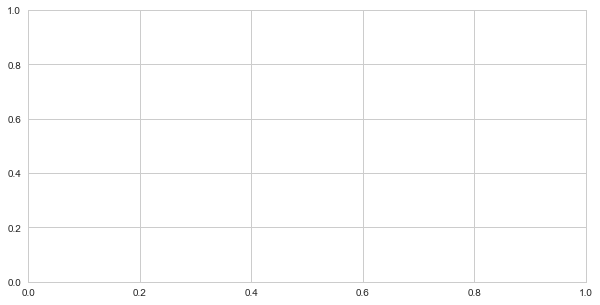

In [88]:
plt.figure(figsize=[10,5])
sns.distplot(np.log(data['count']) , color="skyblue")
print( 'Skewness of normal distribution (should be 0) in our case it is > 0 : {}'.format(skew(data['count']) ))
print('In this case we have value > 0 , so we still have positive skewness after log transformation')
plt.show()

<h2><center>FEATURE SELECTION AND ENGENIRING</center></h2>

Our next step is to see if there is a correlation between left continous variables 

<h2><center>CONTINUOUS</center></h2>

In [ ]:
df_continous.head(5)

Our next step is to make pearson coorealtion. Each variable with our dependent variable. <br>
We want the results to be as high as possible. We also wanted to check if there <br>
is any coorelation between variables. So we did a coorelation matirx. 

In [ ]:
from pydoc import help
from scipy.stats.stats import pearsonr

hum_count = pearsonr(df_continous['hum'], df_continous['count'])
temp_count = pearsonr(df_continous['temp'], df_continous['count'])
atemp_count = pearsonr(df_continous['atemp'], df_continous['count'])
windspeed_count = pearsonr(df_continous['windspeed'], df_continous['count'])
casual_count = pearsonr(df_continous['casual'], df_continous['count'])
registered_count = pearsonr(df_continous['registered'], df_continous['count'])


models = pd.DataFrame({
    'Column': ['Hum', 'Temp', 
              'Atemp','Windspeed','Casual','Registered'],
    'Pearson':[hum_count,temp_count,atemp_count,windspeed_count,casual_count,registered_count]
    })
models = models[['Column','Pearson']]
models.sort_values(by='Pearson', ascending=False)

As we can see the highest results had variables : registered , casual and temp.<br>
From the results above we have can also see that the lowest results were achived by windspeed, hum and atemp. 


In [ ]:
cm = np.corrcoef(df_continous[cols].values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(15,15))  
hm=sns.heatmap(cm , annot=True , cbar=True , square=True , fmt='.2f' , annot_kws={'size':15} , yticklabels=cols , xticklabels=cols,ax=ax)
plt.show()


As we can see from the heatmap above the biggest noticable coorelation is between variables a temp and temp 
<br>
This coorelation is noticable becouse of the variables are temperatures. The first one (temp) it is Normalized temperature , the second one (atemp) it is Normalized feeling temperature in Celsius
<br>
There is also noticable coorelation between variables registered and count , it is coused becoused people that have registered  it is a count of registered users and count it is total rental bikes including both casual and registered

Based on the results from the pearson coorelation and the heat map we have decieded to get rid of atemp and registered. W decided not to drop hum becouse it is explainable that the biger the humidity the lower the number of rented bikes. We also decided not to drop the windspeed becouse it is explainable that the biger the number of windspeed the lower the number of rented cars.

In [89]:
data=data.drop(columns=['atemp'])

In [90]:
data=data.drop(columns=['registered'])

<h2><center>CATEGORICAL</center></h2>

In [91]:
## ANOVA i wybrać te które mają najniższe p-value 
## continous z categorical 
##Zrobić information value 

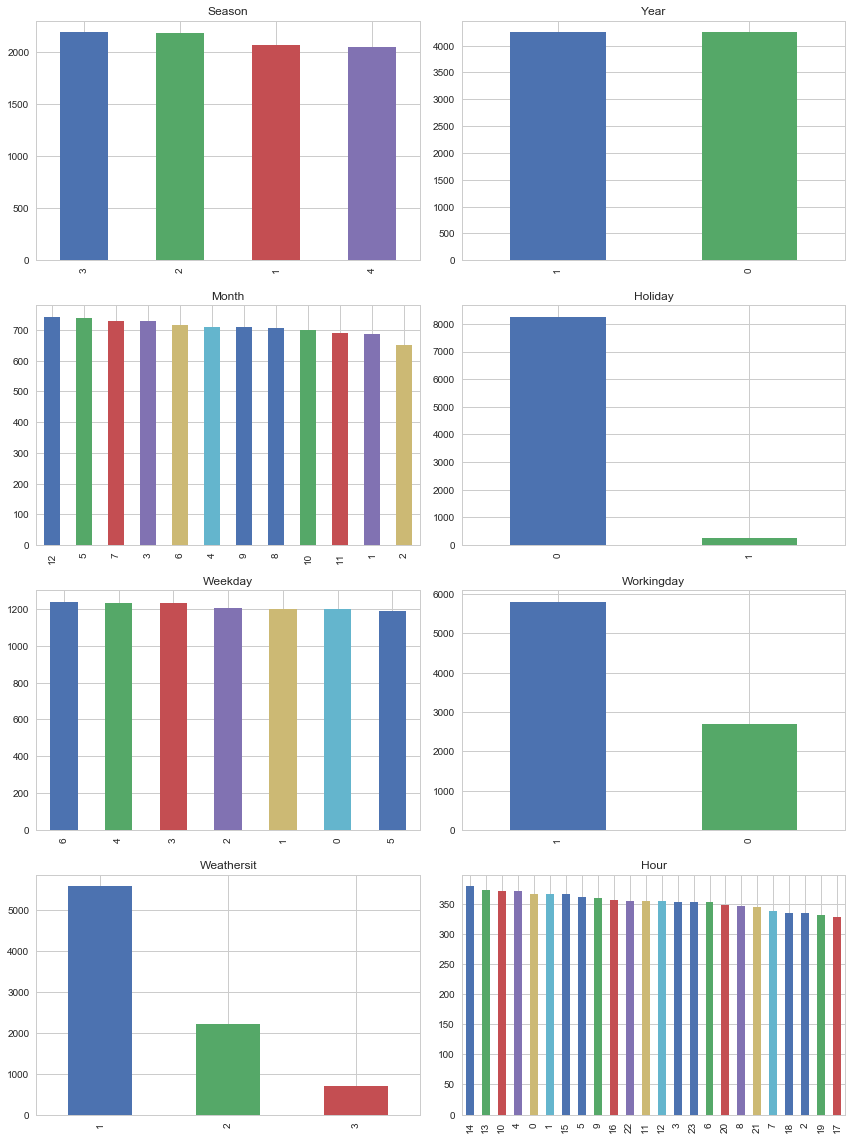

In [92]:
plt.figure(figsize=[12,16])
plt.subplot(421)
df_categorical['season'].value_counts().plot(kind='bar')
plt.title('Season')
plt.subplot(422)
df_categorical['yr'].value_counts().plot(kind='bar')
plt.title('Year')
plt.subplot(423)
df_categorical['mnth'].value_counts().plot(kind='bar')
plt.title('Month')
plt.subplot(424)
df_categorical['holiday'].value_counts().plot(kind='bar')
plt.title('Holiday')
plt.subplot(425)
df_categorical['weekday'].value_counts().plot(kind='bar')
plt.title('Weekday')
plt.subplot(426)
df_categorical['workingday'].value_counts().plot(kind='bar')
plt.title('Workingday')
plt.subplot(427)
df_categorical['weathersit'].value_counts().plot(kind='bar')
plt.title('Weathersit')
plt.subplot(428)
df_categorical['hr'].value_counts().plot(kind='bar')
plt.title('Hour')
plt.tight_layout()

We also looked at the categorical variables to see if there are some interesting features 
<br>
As we can see from the barplots above the most interesting results were from variables : Holiday , Weathersit and Workingday
<br>
As we can see on the graph that represents Holiday - the biggest is the number of people that have used bikes during the days that were not holidays
<br>
From the plot that represents working day the bigger majority of people have used the system during working days 
<br>
In case of Weathersit we can see that the bikes were not used  when the wether was not appropriate for using them like heavy rain or ice pallets

<h2><center>DATA MINING</center></h2>

We wanted to take a deeper look into our continour variables to see if we can do something more with them. 
We decided to take a look into quartiles of variables casual and temp.

In [93]:
#casual1 = np.percentile(data.casual, 25)
#casual2 = np.percentile(data.casual, 50)
#casual3 = np.percentile(data.casual, 75)
#temp1 = np.percentile(data.temp, 25)
#temp2 = np.percentile(data.temp, 50)
#temp3 = np.percentile(data.temp, 75)
#windspeed1 = np.percentile(data.windspeed, 25)
#windspeed2 = np.percentile(data.windspeed, 50)
#windspeed3 = np.percentile(data.windspeed, 75)
#hum1 = np.percentile(data.hum, 25)
#hum2 = np.percentile(data.hum, 50)
#hum3 = np.percentile(data.hum, 75)

In [94]:
#models = pd.DataFrame({
 #   'Variable': ['casual', 'temp','windspeed','hum'],
  #  '25':[casual1,temp1,windspeed1,hum1],
   # '50':[casual2,temp2,windspeed2,hum2],
    #'75':[casual3,temp3,windspeed3,hum3],
     #   })
#models = models[['Variable','25', '50','75']]
#models.sort_values(by='25', ascending=False)



In [95]:
#q = [0,0.25, 0.5, 0.75,1.0]
#data['cut_casual'] =  pd.qcut(data.casual, q, labels=None, retbins=False, precision=3, duplicates='raise')
#data['cut_windspeed'] =  pd.qcut(data.windspeed, q, labels=None, retbins=False, precision=3, duplicates='raise')
#data['cut_temp'] =  pd.qcut(data.temp, q, labels=None, retbins=False, precision=3, duplicates='raise')
#data['cut_hum'] =  pd.qcut(data.hum, q, labels=None, retbins=False, precision=3, duplicates='raise')

For each variable we have extracted 4 quartiles with range 0 - 25% , 35%-50% , 50% - 75% and 75% 100%. 

In [96]:
#plt.figure(figsize=[12,16])
#ax = plt.subplot(421)
#data['cut_casual'].value_counts().plot(kind='bar')
#ax.set_ylabel('Frequency')
#ax.set_title('Casual')
#ax.set_xticklabels(('First quartile (0,4.0)', 'Fourth quartile (48,367)', 'Third quartile (17,48)', 'Second quartile (4,17)'))
#ax2= plt.subplot(422)
#data['cut_temp'].value_counts().plot(kind='bar')
#ax2.set_ylabel('Frequency')
#ax2.set_title('Temp')
#ax2.set_xticklabels(('First quartile (0,0.34)', 'Third quartile (0.5,0.66)', 'Second quartile (0.34,0.5)', 'Fourth quartile (0.66,1)'))
#ax3 = plt.subplot(423)
#data['cut_hum'].value_counts().plot(kind='bar')
#ax3.set_ylabel('Frequency')
#ax3.set_title('Hum')
#ax3.set_xticklabels(('Second quartile (0,0.48)', 'Third quartile (0.62,0.78)', 'Fourth quartile (0.78,1)', 'Third quartile (0.48,0.62)'))
#ax1 = plt.subplot(424)
#data['cut_windspeed'].value_counts().plot(kind='bar')
#ax1.set_ylabel('Frequency')
#ax1.set_title('Windspeed')
#ax1.set_xticklabels(('First quartile (0,0.1045)', 'Second quartile (0.1045,0.1940)', 'Fourth quartile (0.2537,0.851)', 'Third quartile (0.194,0.2537)'))





As we can see from the barplots above in case of the casual and temp variable the most observations where in the first quartile. 


Our next step is to create dummy variables for categorical variables like weekday , month , season , cut_casual , cut_temp and weathersit.

In [97]:
data = pd.get_dummies(data=data, columns = ['weekday',  'mnth','season','weathersit'],                                 
                      prefix = ['weekday','mnth','season','weathersit'])


In [98]:
data.head(5)

,count,casual,windspeed,hum,temp,workingday,holiday,hr,yr,weekday_0,...,mnth_10,mnth_11,mnth_12,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
12617,5.488938,46,0.2239,0.65,0.64,1,0,22,1,0,...,0,0,0,0,1,0,0,0,1,0
7326,4.477337,11,0.0896,0.81,0.36,0,0,21,0,1,...,0,1,0,0,0,0,1,1,0,0
1463,1.609438,0,0.4478,1.00,0.42,0,0,7,0,1,...,0,0,0,1,0,0,0,0,0,1
12302,3.806662,4,0.3582,0.88,0.62,1,0,19,1,0,...,0,0,0,0,1,0,0,0,0,1
5537,6.398595,178,0.2239,0.34,0.72,1,0,15,0,0,...,0,0,0,0,0,1,0,1,0,0


With changing variables to dummy variables we have recived additional columns where each one of them represents acertain day/month/season or weathersit.

To continue further actions we need to change newly created dummy variables to categorical type

In [99]:
for col in ['workingday','holiday','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6',
           'mnth_1','mnth_2','mnth_3','mnth_4','mnth_5','mnth_6','mnth_7','mnth_8','mnth_9','mnth_10','mnth_11','mnth_12',
           'season_1','season_2','season_3','season_4','weathersit_1','weathersit_2','weathersit_3','yr']:
    data[col] = data[col].astype('category')

In [100]:
data = pd.get_dummies(data=data, columns = ['hr'],                                 
                      prefix = ['hr'])


In [101]:
for col in ['hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23']:
    data[col] = data[col].astype('category')

In [102]:
data.dtypes

count            float64
casual             int64
windspeed        float64
hum              float64
temp             float64
workingday      category
holiday         category
yr              category
weekday_0       category
weekday_1       category
weekday_2       category
weekday_3       category
weekday_4       category
weekday_5       category
weekday_6       category
mnth_1          category
mnth_2          category
mnth_3          category
mnth_4          category
mnth_5          category
mnth_6          category
mnth_7          category
mnth_8          category
mnth_9          category
mnth_10         category
mnth_11         category
mnth_12         category
season_1        category
season_2        category
season_3        category
season_4        category
weathersit_1    category
weathersit_2    category
weathersit_3    category
hr_0            category
hr_1            category
hr_2            category
hr_3            category
hr_4            category
hr_5            category


<h1><center>CROSS VALIDATION</center></h1>

After all the preparations we can finally split our dataset to train set and test set

In [103]:
data = data.rename(columns ={'count': 'y'})



In [104]:
data.head(5)

,y,casual,windspeed,hum,temp,workingday,holiday,yr,weekday_0,weekday_1,...,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23
12617,5.488938,46,0.2239,0.65,0.64,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7326,4.477337,11,0.0896,0.81,0.36,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1463,1.609438,0,0.4478,1.00,0.42,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12302,3.806662,4,0.3582,0.88,0.62,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5537,6.398595,178,0.2239,0.34,0.72,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


<h1><center>IMPLEMENTATION OF ALGORITHM</center></h1>


In [105]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

<h1><center>Linear Regression</center></h1>

In [106]:
from sklearn.model_selection import KFold
K=5
kf = KFold(n_splits=K, shuffle=True)
lr = LinearRegression()
r2sumlr=0
msesumlr=0
maesumlr=0
rmslesumlr=0

for train,test in kf.split(data.index.values):
    X_train=data.iloc[train]
    y_train=X_train['y']
    X_train=X_train.drop(columns=['y'])
    X_test=data.iloc[test]
    y_test=X_test['y']
    X_test=X_test.drop(columns=['y'])
    
    lr.fit(X = X_train,y = y_train)
    # Make predictions
    predslr = lr.predict(X= X_test)
    
    print("R^2: %.2f" % metrics.r2_score(round(np.exp(y_test)), np.exp(predslr)))
    print("Mean squared error: %.2f" % metrics.mean_squared_error(round(np.exp(y_test)), np.exp(predslr)))
    print("Mean absolute error: %.2f" % metrics.mean_absolute_error(round(np.exp(y_test)), np.exp(predslr)))
    print ("RMSLE Value For Linear Regression: ",rmsle(round(np.exp(y_test)),np.exp(predslr)))
    
    r2sumlr=r2sumlr+metrics.r2_score(round(np.exp(y_test)), np.exp(predslr))/K
    msesumlr=msesumlr+metrics.mean_squared_error(round(np.exp(y_test)), np.exp(predslr))/K
    maesumlr=maesumlr+metrics.mean_absolute_error(round(np.exp(y_test)), np.exp(predslr))/K
    rmslesumlr=rmslesumlr+rmsle(round(np.exp(y_test)),np.exp(predslr))/K
    
    
print(r2sumlr,msesumlr,maesumlr,rmslesumlr)
  



R^2: 0.71
Mean squared error: 8099.85
Mean absolute error: 55.95
RMSLE Value For Linear Regression:  0.5563235762718438
R^2: 0.64
Mean squared error: 11204.33
Mean absolute error: 60.23
RMSLE Value For Linear Regression:  0.5748151103775179
R^2: 0.64
Mean squared error: 9600.77
Mean absolute error: 55.95
RMSLE Value For Linear Regression:  0.5443942033078627
R^2: 0.65
Mean squared error: 9140.36
Mean absolute error: 55.47
RMSLE Value For Linear Regression:  0.5707734636637534
R^2: 0.58
Mean squared error: 11916.29
Mean absolute error: 59.70
RMSLE Value For Linear Regression:  0.5605325997170396
0.6436911709147253 9992.319518281482 57.45990801833416 0.5613677906676035


<h1><center>RANDOM FOREST REGRESSOR</center></h1>

In [107]:
rf = RandomForestRegressor(n_estimators=100)

K=5
kf = KFold(n_splits=K, shuffle=True)

r2sumrfr=0
msesumrfr=0
maesumrfr=0
rmslesumrfr=0

for train,test in kf.split(data.index.values):
    X_train=data.iloc[train]
    y_train=X_train['y']
    X_train=X_train.drop(columns=['y'])
    X_test=data.iloc[test]
    y_test=X_test['y']
    X_test=X_test.drop(columns=['y'])
    
    rf.fit(X_train, y_train)
    # Make predictions
    predsrf = rf.predict(X_test)
    
    print("R^2: %.2f" % metrics.r2_score(round(np.exp(y_test)), predsrf))
    print("Mean squared error: %.2f" % metrics.mean_squared_error(round(np.exp(y_test)), predsrf))
    print("Mean absolute error: %.2f" %metrics.mean_absolute_error(round(np.exp(y_test)), predsrf))
    print ("RMSLE Value For RIDGE REGRESSION: ",rmsle(round(np.exp(y_test)), predsrf))
    
    r2sumrfr=r2sumrfr+metrics.r2_score(round(np.exp(y_test)), np.exp(predsrf))/K
    msesumrfr=msesumrfr+metrics.mean_squared_error(round(np.exp(y_test)), np.exp(predsrf))/K
    maesumrfr=maesumrfr+metrics.mean_absolute_error(round(np.exp(y_test)), np.exp(predsrf))/K
    rmslesumrfr=rmslesumrfr+rmsle(round(np.exp(y_test)),np.exp(predsrf))/K
    
    
print(r2sumrfr,msesumrfr,maesumrfr,rmslesumrfr)

R^2: -1.11
Mean squared error: 58425.66
Mean absolute error: 176.31
RMSLE Value For RIDGE REGRESSION:  3.091125950645913
R^2: -1.09
Mean squared error: 58895.14
Mean absolute error: 176.20
RMSLE Value For RIDGE REGRESSION:  3.083708717781567
R^2: -1.04
Mean squared error: 58752.16
Mean absolute error: 174.39
RMSLE Value For RIDGE REGRESSION:  3.064430977247562
R^2: -1.05
Mean squared error: 55621.44
Mean absolute error: 169.88
RMSLE Value For RIDGE REGRESSION:  3.047732597519244
R^2: -1.11
Mean squared error: 59952.60
Mean absolute error: 178.88
RMSLE Value For RIDGE REGRESSION:  3.09626475509623
0.9464527982105839 1502.1888699274382 23.787582985483382 0.30108310604138455


<h1><center>GRADIENT BOOST</center></h1>

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=2000,alpha=0.01); ### Test 0.41
lr = LinearRegression()
K=5
kf = KFold(n_splits=K, shuffle=True)

r2sumgb=0
msesumgb=0
maesumgb=0
rmslesumgb=0

for train,test in kf.split(data.index.values):
    X_train=data.iloc[train]
    y_train=X_train['y']
    X_train=X_train.drop(columns=['y'])
    X_test=data.iloc[test]
    y_test=X_test['y']
    X_test=X_test.drop(columns=['y'])
    
    # Train the model
    gbm.fit(X_train,y_train)
    # Make predictions
    predsgb = gbm.predict(X= X_test)
    
    print("R^2: %.2f" % metrics.r2_score(round(np.exp(y_test)), np.exp(predsgb)))
    print("Mean squared error: %.2f" % metrics.mean_squared_error(round(np.exp(y_test)), np.exp(predsgb)))
    print("Mean absolute error: %.2f" % metrics.mean_absolute_error(round(np.exp(y_test)), np.exp(predsgb)))
    print ("RMSLE Value For Linear Regression: ",rmsle(round(np.exp(y_test)),np.exp(predsgb)))
    
    r2sumgb=r2sumgb+metrics.r2_score(round(np.exp(y_test)), np.exp(predsgb))/K
    msesumgb=msesumgb+metrics.mean_squared_error(round(np.exp(y_test)), np.exp(predsgb))/K
    maesumgb=maesumgb+metrics.mean_absolute_error(round(np.exp(y_test)), np.exp(predsgb))/K
    rmslesumgb=rmslesumgb+rmsle(round(np.exp(y_test)),np.exp(predsgb))/K
    
    
print(r2sumgb,msesumgb,maesumgb,rmslesumgb)
  


R^2: 0.95
Mean squared error: 1330.03
Mean absolute error: 22.29
RMSLE Value For Linear Regression:  0.2663710408669135
R^2: 0.96
Mean squared error: 1106.54
Mean absolute error: 20.52
RMSLE Value For Linear Regression:  0.26984256284361685
R^2: 0.96
Mean squared error: 1111.89
Mean absolute error: 21.40
RMSLE Value For Linear Regression:  0.2697424317414887
R^2: 0.95
Mean squared error: 1342.86
Mean absolute error: 22.50
RMSLE Value For Linear Regression:  0.27052419260093813
R^2: 0.96
Mean squared error: 1082.36
Mean absolute error: 21.18
RMSLE Value For Linear Regression:  0.26892470018825904
0.9574078064346762 1194.7361968813962 21.576604887022995 0.26908098564824323


<h2><center>Conclusion</center></h2>

In [109]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 
              'Gradient Boost'],
    'R2':[r2sumlr,r2sumrfr,r2sumgb],
    'MSE':[msesumlr,msesumrfr,msesumgb],
    'MAE':[maesumlr,maesumrfr,maesumgb],
    'RMSLE':[rmslesumlr,rmslesumrfr,rmslesumgb]
    })
models = models[['Model','R2', 'MAE','MSE' , 'RMSLE']]
models.sort_values(by='R2', ascending=False)


,Model,R2,MAE,MSE,RMSLE
2,Gradient Boost,0.957408,21.576605,1194.736197,0.269081
1,Random Forest Regressor,0.946453,23.787583,1502.188870,0.301083
0,Linear Regression,0.643691,57.459908,9992.319518,0.561368


In [110]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 
              'Gradient Boost'],
    'R2':[r2sumlr,r2sumrfr,r2sumgb],
    'MSE':[msesumlr,msesumrfr,msesumgb],
    'MAE':[maesumlr,maesumrfr,maesumgb],
    'RMSLE':[rmslesumlr,rmslesumrfr,rmslesumgb]
    })
models = models[['Model','R2', 'MAE','MSE' , 'RMSLE']]
models.sort_values(by='R2', ascending=False)

,Model,R2,MAE,MSE,RMSLE
2,Gradient Boost,0.957408,21.576605,1194.736197,0.269081
1,Random Forest Regressor,0.946453,23.787583,1502.188870,0.301083
0,Linear Regression,0.643691,57.459908,9992.319518,0.561368


Because of the smallest Mean Absolute Error, Mean Square Error and  Root Mean Squared Logarithmic Error Gradient Boost and highest R2 the best model is Gradient Boost.

<h2><center>Checking best model <br>Based on R2/MAE/MSE/RMSLE</center></h2>

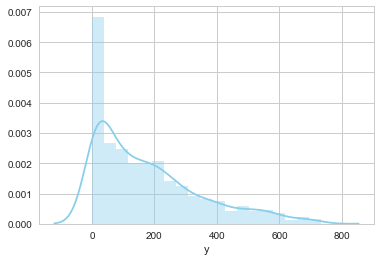

In [111]:
sns.distplot(round(np.exp(y_test)) , color="skyblue")
plt.show()

In [112]:
details=pd.DataFrame({
     'y_test':round(np.exp(y_test)),
     'y_pred':np.exp(predsgb)
})
details[details['y_test']<25].head(10)

,y_pred,y_test
1950,28.647961,20.0
10681,2.802431,4.0
6491,11.364807,6.0
7856,27.892259,22.0
1575,3.169994,5.0
301,9.833857,14.0
6808,22.493363,10.0
4924,11.066818,13.0
1484,7.414116,1.0
6949,10.830606,8.0


In [113]:
details[details['y_test']>200].head(10)

,y_pred,y_test
12617,238.241197,242.0
6794,430.856997,443.0
13230,284.110338,249.0
16575,324.858288,322.0
13145,285.584519,288.0
5923,241.704339,288.0
12495,367.529365,363.0
11911,291.017301,330.0
7875,179.611992,250.0
12345,631.573661,678.0
